In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100)

# Evaluasi
print("Prediksi:", model.predict(X_test))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.4206
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 1.4061
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 1.3916
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 1.3773
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - loss: 1.3631
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step - loss: 1.3490
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 1.3349
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - loss: 1.3210
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 1.3072
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - loss: 1.2934
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 1.2798
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 1.2663
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 1.2529
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - loss: 1.2396
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 1.2264
Epoch 1

Tugas 4:

Ubah learning rate.

Bandingkan hasil loss.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Dataset sederhana
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Fungsi untuk membuat model
def make_model(lr):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
        tf.keras.layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='mse')
    return model

learning_rates = [0.001, 0.01, 0.1]
results = {}

for lr in learning_rates:
    print(f"\n=== Training dengan learning rate = {lr} ===")
    model = make_model(lr)
    history = model.fit(X_train, y_train, epochs=100, verbose=0)

    loss = model.evaluate(X_test, y_test, verbose=0)
    results[lr] = loss

# Hasil akhir
print("\n=== HASIL PERBANDINGAN LOSS ===")
for lr, loss in results.items():
    print(f"Learning Rate {lr}: Loss = {loss:.6f}")



=== Training dengan learning rate = 0.001 ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



=== Training dengan learning rate = 0.01 ===

=== Training dengan learning rate = 0.1 ===

=== HASIL PERBANDINGAN LOSS ===
Learning Rate 0.001: Loss = 0.129744
Learning Rate 0.01: Loss = 0.051177
Learning Rate 0.1: Loss = 0.007452


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


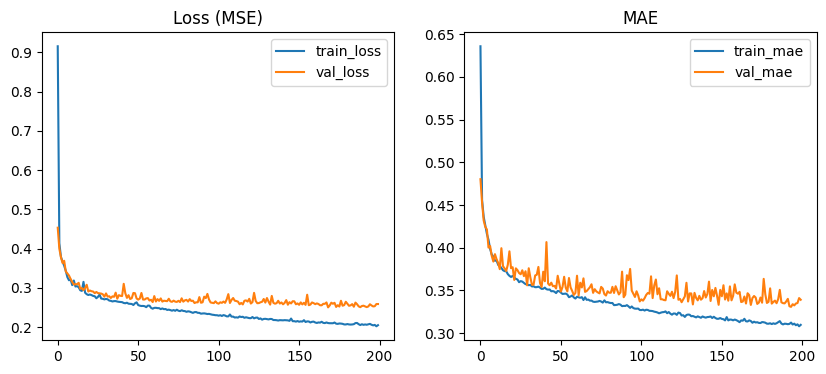

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
RMSE: 0.5087925747928893


In [ ]:
# MLP regresi (Keras) California Housing
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# 1. Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Preprocess
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(
    Xs, y, test_size=0.2, random_state=42
)

# 3. Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(1e-3), loss='mse', metrics=['mae'])

# 4. Train
h = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=32,
    verbose=0
)

# 5. Plot grafik
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(h.history['loss'], label='train_loss')
plt.plot(h.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss (MSE)')

plt.subplot(1,2,2)
plt.plot(h.history['mae'], label='train_mae')
plt.plot(h.history['val_mae'], label='val_mae')
plt.legend()
plt.title('MAE')

plt.show()

# 6. Hitung RMSE
pred = model.predict(X_val)
print("RMSE:", np.sqrt(mean_squared_error(y_val, pred)))
